In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def Active_site(row, col): 
    """check specifice site is Active or not"""
        return (row >= 0 and row < lattice_size and col >= 0 and col < lattice_size and not visited[row][col] and lattice[row][col]>0)

In [3]:
def  Depth_First_Search(row, col,color):  
    """ search for all site in specific cluster"""
    rowNbr = [-1,0,0,1]
    colNbr = [0,-1,1,0]
          
        
    visited[row][col] = True
    lattice[row][col] = color
  
    for k in range(0,4): 
        if Active_site(row + rowNbr[k], col + colNbr[k]): 
            Depth_First_Search(row + rowNbr[k], col + colNbr[k],color)

## Percolating

In [24]:
lattice_size = 20
p = 0.55
start = np.ones((lattice_size,1))
end = np.ones((lattice_size,1)) * 20

In [25]:
lattice = np.random.choice([0,1],p=[1-p,p],size=((lattice_size,lattice_size - 2)))
lattice = np.concatenate((start,lattice,end),axis = 1)

visited = np.array([[False for j in range(lattice_size)]for i in range(lattice_size)])

In [26]:
color = 10
for row in range(lattice_size):
    for col in range(1,lattice_size):
        
        if visited[row][col] == False and lattice[row][col] == 1:
            Depth_First_Search(row, col, color)
            color = color + 5

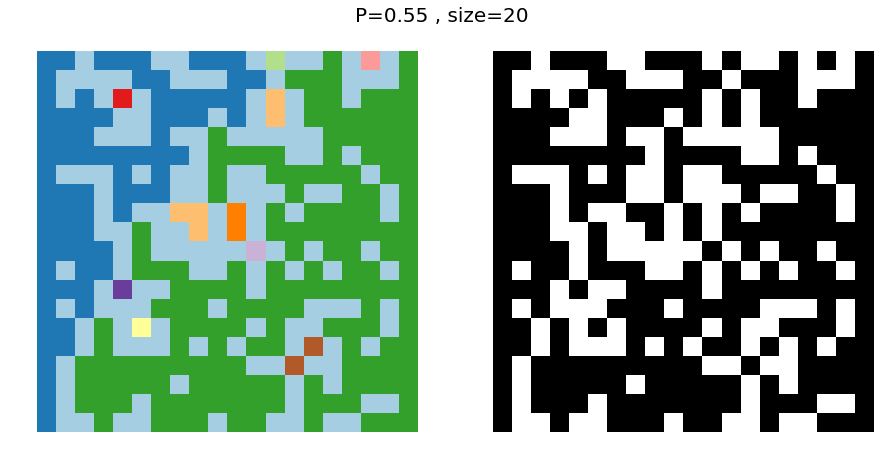

In [27]:
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('P=%.2f , size=%i'%(p,lattice_size),y = 0.72,fontsize = 20)

axes[0].axis('off')
axes[0].imshow(lattice, 'Paired')#cmap= plt.cm.gnuplot)

axes[1].axis('off')
axes[1].imshow(1 * visited,'binary')

#plt.savefig('Coloring  fig4')

Reference

https://www.geeksforgeeks.org/find-number-of-islands/